<a href="https://colab.research.google.com/github/rahilshah10/loan-sharks/blob/master/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. Importing the Data

In [0]:
# Having all the necessary libaries for 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
from sklearn import preprocessing,metrics 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

Read the data into a pandas dataframe

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/My Drive/Colab/loan.csv"

'/content/gdrive/My Drive/Colab/loan.csv'


In [0]:
start_df = pd.read_csv('/content/gdrive/My Drive/Colab/loan.csv', low_memory=False)

Check the basic dataframe info

In [5]:
df = start_df.copy(deep=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


There are 2.2 million rows and 145 columns. The data set is about 2.4GB.

Let's take a look at the first 5 rows to see what we are getting into.

In [6]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

We also want to understand the columns we have with the data dictionary provided.

### 3. Target Variable

We are going to predict the variable loan_status. What are the value counts?

In [7]:
df['loan_status'].value_counts(dropna=False)

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

We are going to only considers the Charged Off and Fully Paid values.

In [0]:
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [9]:
df.shape

(1303607, 145)

There are still 1303607 loans remaining. Lets recheck their status.

In [0]:
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
df= df.replace({"loan_status": di})

In [11]:
df['loan_status'].value_counts(normalize=True)

0    0.799284
1    0.200716
Name: loan_status, dtype: float64

About 80% of the loans are fully paid and the rest 20% percent are charged off, so we can see a somewhat imbalance in our target variable

### 4. Feature space limiting

The dataset consists of 145 features for each loan. We will divide our feature selection in two steps:

1. Drop the features with more than 30% missing data.
2. Of the remaining features, we chose only those that would be the best ones.

### 4.1 Drop features with missing data

First calculate the percentage of missing data for each feature:

In [0]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [13]:
# Missing values statistics
miss_values = missing_values_table(df)
miss_values.head(10)

Your selected dataframe has 145 columns.
There are 105 columns that have missing values.


,Missing Values,% of Total Values
id,1303607,100.0
url,1303607,100.0
member_id,1303607,100.0
next_pymnt_d,1303607,100.0
orig_projected_additional_accrued_interest,1300174,99.7
hardship_type,1298272,99.6
hardship_reason,1298272,99.6
hardship_status,1298272,99.6
hardship_last_payment_amount,1298272,99.6
hardship_payoff_balance_amount,1298272,99.6


In [0]:
missing_fractions = df.isnull().mean().sort_values(ascending=False)

Let's visualize the distribution of missing data

Text(0, 0.5, 'Feature count')

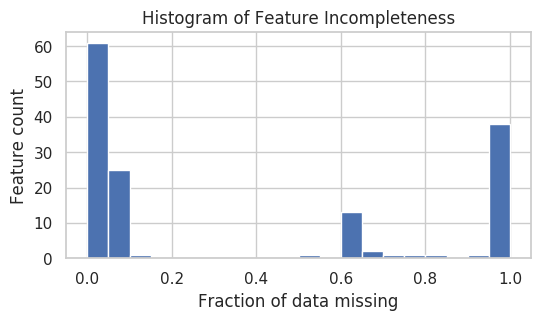

In [15]:
plt.figure(figsize=(6,3),dpi=100)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

We can see that there a huge gap between the features missing some data(<20%) and those who are missing a lot of data(>40%). Since its very difficult to impute the remaining data accurately for the columns with more than 30% missing values, we drop those columns.

First storing all columns missing more than 30% data into a list:

In [16]:
drop_list = list(missing_fractions[missing_fractions>0.3].index)
print(drop_list)

['id', 'member_id', 'url', 'next_pymnt_d', 'orig_projected_additional_accrued_interest', 'hardship_length', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_end_date', 'payment_plan_start_date', 'hardship_start_date', 'hardship_dpd', 'hardship_last_payment_amount', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'revol_bal_joint', 'sec_app_collections_12_mths_ex_med', 'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il', 'sec_app_open_acc', 'sec_app_mort_acc', 'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'settlement_percentage', 'settlement_term', 'settlement_status', 'settlement_amount', 'settlement_date', 'debt_settlement_flag_date', 'desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'il_util', 'mths_since_recent_revol_del

No of features being dropped

In [17]:
len(drop_list)

58

Dropping these features:

In [0]:
df.drop(labels=drop_list, axis=1, inplace=True)

In [19]:
df.shape

(1303607, 87)

### 4.2 Keeping useful features

After researching through the data dictionary we decide to keep only the use full features from all the remaining features we have.

In [20]:
features = ['funded_amnt','emp_length','annual_inc','home_ownership','grade',
            "last_pymnt_amnt", "mort_acc", "pub_rec", "int_rate", "open_acc","num_actv_rev_tl",
            "mo_sin_rcnt_rev_tl_op","mo_sin_old_rev_tl_op","bc_util","bc_open_to_buy",
            "avg_cur_bal","acc_open_past_24mths",'loan_status'] 
Final_data = df[features]
Final_data = Final_data.reset_index(drop=True)
Final_data.shape

(1303607, 18)

In [21]:
Final_data['emp_length'].value_counts()

10+ years    428547
2 years      117820
< 1 year     104550
3 years      104200
1 year        85677
5 years       81623
4 years       78029
6 years       60933
8 years       59125
7 years       58145
9 years       49504
Name: emp_length, dtype: int64

In [22]:
Final_data.head()

,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,30000,5 years,100000.0,MORTGAGE,D,30082.32,1.0,1.0,22.35,11.0,4.0,23.0,73.0,46.9,15181.0,42939.0,4.0,0
1,40000,< 1 year,45000.0,MORTGAGE,C,40910.48,1.0,0.0,16.14,18.0,9.0,2.0,70.0,67.3,14930.0,15059.0,5.0,0
2,20000,10+ years,100000.0,MORTGAGE,A,20228.39,5.0,0.0,7.56,9.0,5.0,1.0,238.0,29.9,59684.0,57309.0,5.0,0
3,4500,10+ years,38500.0,RENT,B,4553.46,0.0,0.0,11.31,12.0,5.0,2.0,69.0,28.9,10735.0,2428.0,8.0,0
4,8425,3 years,450000.0,MORTGAGE,E,8754.30,4.0,0.0,27.27,21.0,8.0,12.0,89.0,74.6,11632.0,34516.0,10.0,0


### 5. Data Transformation

We need to transform some categotial values in our dataset to numerical labels so we can use it to work with some models
Grade and home_ownership should be encoded to numerical values.
Also emp_length is in a format of string i.e. "5 years","1 year" which needs to be changed to its numerical values.

In [23]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
Final_data["home_ownership"] = lb_make.fit_transform(Final_data["home_ownership"])
Final_data["grade"] = lb_make.fit_transform(Final_data["grade"])
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
Final_data.astype({'emp_length':'float'})
print("Current shape of dataset :",Final_data.shape)
Final_data.head()

Current shape of dataset : (1303607, 18)


,funded_amnt,emp_length,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,30000,5,100000.0,1,3,30082.32,1.0,1.0,22.35,11.0,4.0,23.0,73.0,46.9,15181.0,42939.0,4.0,0
1,40000,1,45000.0,1,2,40910.48,1.0,0.0,16.14,18.0,9.0,2.0,70.0,67.3,14930.0,15059.0,5.0,0
2,20000,10,100000.0,1,0,20228.39,5.0,0.0,7.56,9.0,5.0,1.0,238.0,29.9,59684.0,57309.0,5.0,0
3,4500,10,38500.0,5,1,4553.46,0.0,0.0,11.31,12.0,5.0,2.0,69.0,28.9,10735.0,2428.0,8.0,0
4,8425,3,450000.0,1,4,8754.30,4.0,0.0,27.27,21.0,8.0,12.0,89.0,74.6,11632.0,34516.0,10.0,0


In [24]:
Final_data.isnull().sum()

funded_amnt                  0
emp_length               75454
annual_inc                   0
home_ownership               0
grade                        0
last_pymnt_amnt              0
mort_acc                 47281
pub_rec                      0
int_rate                     0
open_acc                     0
num_actv_rev_tl          67527
mo_sin_rcnt_rev_tl_op    67528
mo_sin_old_rev_tl_op     67528
bc_util                  61386
bc_open_to_buy           60639
avg_cur_bal              67548
acc_open_past_24mths     47281
loan_status                  0
dtype: int64

In [0]:
Final_data.fillna(Final_data.mean(),inplace=True)

In [26]:
Final_data.isnull().sum()

funded_amnt                  0
emp_length               75454
annual_inc                   0
home_ownership               0
grade                        0
last_pymnt_amnt              0
mort_acc                     0
pub_rec                      0
int_rate                     0
open_acc                     0
num_actv_rev_tl              0
mo_sin_rcnt_rev_tl_op        0
mo_sin_old_rev_tl_op         0
bc_util                      0
bc_open_to_buy               0
avg_cur_bal                  0
acc_open_past_24mths         0
loan_status                  0
dtype: int64

In [0]:
scl = preprocessing.StandardScaler()
fields = Final_data.columns.values[:-1]
data_clean_full = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean_full['loan_status'] = Final_data['loan_status']
data_clean_full['loan_status'].value_counts()
data_clean_full.drop('emp_length',axis=1, inplace=True)


In [43]:
loanstatus_0 = data_clean_full[data_clean_full["loan_status"]==0]
loanstatus_1 = data_clean_full[data_clean_full["loan_status"]==1]
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)

data_clean.drop('emp_length',axis=1, inplace=True)
data_clean.head(5)

Current shape of dataset : (11000, 18)


,funded_amnt,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths,loan_status
0,-0.184938,-0.501921,-0.997298,0.962661,1.032932,-0.343878,-0.357498,0.691682,-1.206221,-0.512689,-0.635846,0.408238,1.295149,-0.622616,-0.551529,0.416865,0
1,0.068068,-0.449957,1.090493,-1.350475,-0.723920,-0.851916,-0.357498,-1.232469,0.989458,0.421691,0.057588,-0.723916,-0.669578,0.439981,-0.749404,-0.222749,1
2,-0.184938,-0.516197,1.090493,-0.579430,-0.706796,-0.851916,-0.357498,-0.371223,-1.206221,-0.201229,-0.635846,0.234060,-0.919700,-0.245224,-0.657437,0.097058,1
3,0.643080,-0.279462,-0.997298,1.733707,2.042245,-0.343878,1.301257,2.636838,-0.108382,-0.201229,-0.572807,1.224694,0.015539,-0.578107,-0.378570,1.056479,0
4,-0.851952,0.254694,1.090493,-0.579430,-0.733775,-0.851916,-0.357498,-0.444744,-0.291355,-0.512689,3.524761,-0.419105,1.327774,-0.675169,-0.556702,-1.501977,0


findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


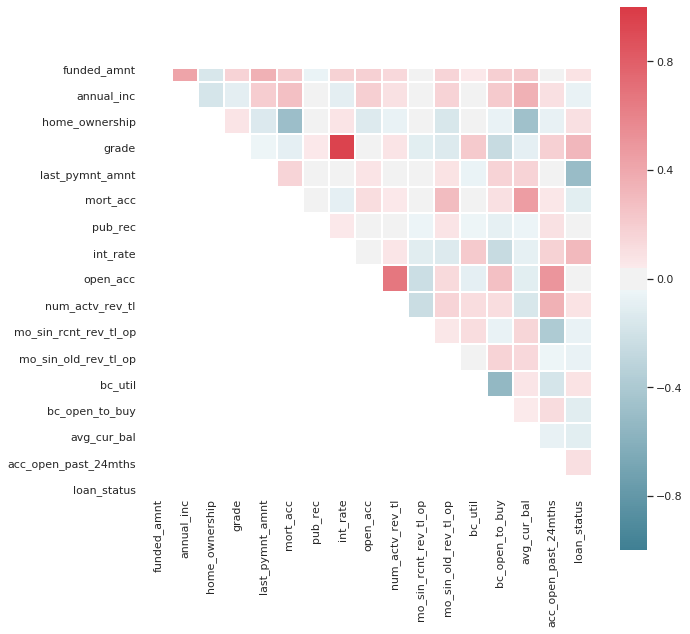

In [44]:
dataViz = data_clean
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

### ROC Plot function

Creating a ROC function to be used for all the models.

In [0]:
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

### Confusion Matrix function

Creating a Confusion Matrix function to be used for all the models.

In [0]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_clean_full.iloc[:,:-1],
                                                    data_clean_full.iloc[:,-1], test_size=0.2,
                                                    random_state=42)
bs_train, bs_test = train_test_split(data_clean_full, test_size = 0.2,
                                     random_state=42) #just for bootstrapping

In [53]:
X_train.head()

,funded_amnt,annual_inc,home_ownership,grade,last_pymnt_amnt,mort_acc,pub_rec,int_rate,open_acc,num_actv_rev_tl,mo_sin_rcnt_rev_tl_op,mo_sin_old_rev_tl_op,bc_util,bc_open_to_buy,avg_cur_bal,acc_open_past_24mths
370638,0.919086,0.625863,-0.997298,0.191616,-0.660810,2.196310,-0.357498,-0.140157,0.623511,-0.201229,-0.068491,1.736341,1.418398,-0.667729,1.117442,0.736672
834646,1.376220,-0.230682,0.568545,1.733707,2.414324,-0.851916,1.301257,2.130593,0.257565,0.421691,0.498865,-1.246448,1.414773,-0.671751,-0.556260,-0.542556
128350,-0.705324,-0.758884,-0.997298,0.191616,-0.058527,-0.851916,-0.357498,0.431207,-1.206221,-0.824150,-0.194570,-0.789232,1.215400,-0.676577,-0.668728,0.097058
1169890,0.022067,-0.329370,-0.997298,0.962661,0.698485,-0.343878,-0.357498,0.905943,-0.474328,0.110231,0.877102,-0.876321,-0.477455,-0.568320,1.486131,-0.862363
1074160,0.068068,-0.087924,1.090493,-0.579430,0.793341,0.164160,-0.357498,-0.333412,3.917029,3.224834,-0.635846,0.125199,0.102538,0.170913,-0.587673,3.295128


In [49]:
data_clean.isnull().sum()

funded_amnt              0
annual_inc               0
home_ownership           0
grade                    0
last_pymnt_amnt          0
mort_acc                 0
pub_rec                  0
int_rate                 0
open_acc                 0
num_actv_rev_tl          0
mo_sin_rcnt_rev_tl_op    0
mo_sin_old_rev_tl_op     0
bc_util                  0
bc_open_to_buy           0
avg_cur_bal              0
acc_open_past_24mths     0
loan_status              0
dtype: int64

## Models

### Random Forest with randomized search

In [39]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,data_clean.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)
# mean_scores = [result.mean_validation_score for result in rand.grid_scores_]
#print('Best Accuracy = '+str(rand.best_score_))
print(rand.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [54]:
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0,n_jobs=-1 )
randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print(rfAccuracy)

0.899130107931053


### Feature Evaluation

Text(0, 0.5, 'Normalized Gini Importance')

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


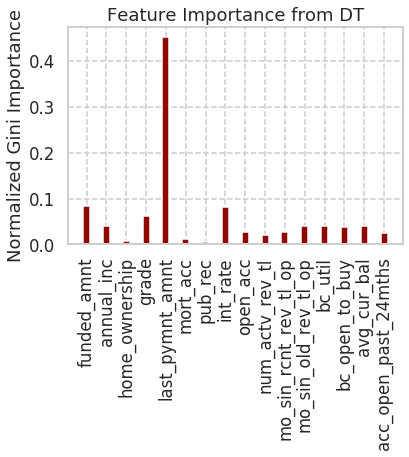

In [57]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)-2), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

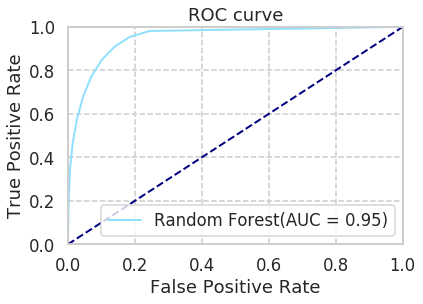

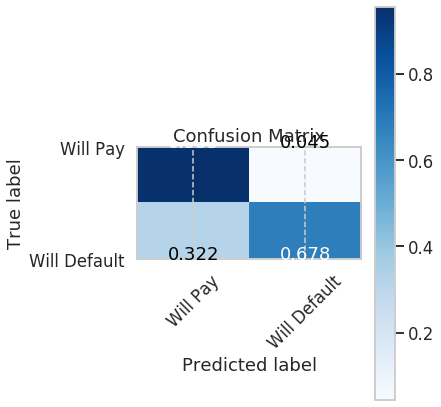

In [59]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()